In [ ]:
#this code is referenced from the official tutorial

# Object Detection

In this tutorial, you will learn:
- to perform inference with a MMDetection detector.
- to train a new detector with a new dataset.

# Install
We have MMpretrain installed for you when you see this page

# Start trying
Ensure you have selected the right kernel (on the top right corner of jupyter lab interface), the one you have just named <br>
now we change the directory to the installed location

In [22]:
cd mmdetection

[Errno 2] No such file or directory: 'mmdetection'
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection


/home/z890/.conda/envs/mm_rtm/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


# Download a pretrained model

In [2]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoint
!mkdir ./output

there are plenty of models <br>
you may check what models are available on <br>
https://mmdetection.readthedocs.io/en/latest/modelzoo_statistics.html <br>

Choose one model from the configs, we use rtmdet_tiny_8xb32-300e_coco as an example <br>
download pretrained model

In [3]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoint

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 51.3 MB/s eta 0:00:00m eta 0:00:010:01:01
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/checkpoint
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/checkpoint


The above code downloads weights of a pretrained model <br>
if it was not successful <br>
please go to terminal, and run: <br>
conda activate "your environment name" <br>
cd mmdetection <br>
mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoint

### Inference the detector

In [4]:
# load the pre-trained model
from mmdet.apis import init_detector
from mmengine import Config

# Load config file for the model
config_file = './configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py' # Example config path
config = Config.fromfile(config_file)

# Initialize detector with pre-trained weights, we just downloaded
checkpoint_file = './checkpoint/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'  # Pre-trained weights
model = init_detector(config, checkpoint_file, device='cuda')

# Access model metadata
print(model.dataset_meta)

Loads checkpoint by local backend from path: ./checkpoint/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

{'classes': ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwa

In [5]:
# from the output of last line, we know the model can detect cat
# Get a cat image online
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL of the image
url = "https://as1.ftcdn.net/jpg/02/36/99/22/1000_F_236992283_sNOxCVQeFLd5pdqaKGh8DRGMZy7P4XKm.jpg"  # Direct URL to the image

# Fetch the image content
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save('Cat.jpg')

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/.conda/envs/mm_rtm/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


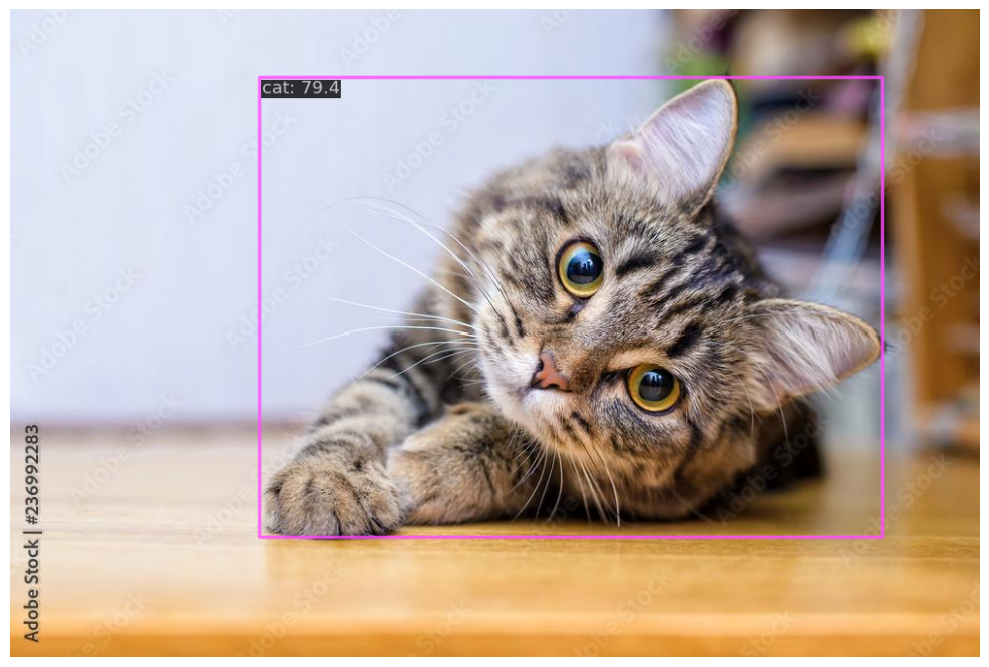

Detection Results:
Class: cat, Score: 0.7944, BBox: [256.9560546875, 71.4450912475586, 897.800537109375, 544.156494140625]


In [6]:
# use the model to spot a cat
from mmdet.apis import inference_detector
import mmcv
import matplotlib.pyplot as plt
import numpy as np

# Run inference on a cat image, or any image you want
img_path = 'Cat.jpg'
result = inference_detector(model, img_path)

# Visualize the results
img = mmcv.imread(img_path)
img = mmcv.imconvert(img, 'bgr', 'rgb')

# Get class names from metadata
class_names = model.dataset_meta.get('classes', None)
threshold = 0.5

# Visualize detection results
from mmdet.visualization import DetLocalVisualizer
visualizer = DetLocalVisualizer()
visualizer.dataset_meta = model.dataset_meta
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
    show=True,
    pred_score_thr=threshold  # Score threshold for detections
)

# Alternative visualization approach
plt.figure(figsize=(10, 10))
plt.imshow(visualizer.get_image())
plt.axis('off')
plt.tight_layout()
plt.show()

# Print the prediction results
print("Detection Results:")
for label_id, score, bbox in zip(
    result.pred_instances.labels, 
    result.pred_instances.scores, 
    result.pred_instances.bboxes
):
    if score>threshold:
        class_name = class_names[label_id]
        print(f"Class: {class_name}, Score: {score:.4f}, BBox: {bbox.tolist()}")

In [7]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

<DetDataSample(
│   
│   META INFORMATION
│   img_id: 0
│   ori_shape: (668, 1000)
│   img_shape: (640, 640)
│   scale_factor: (0.64, 0.6407185628742516)
│   pad_shape: (640, 640)
│   batch_input_shape: (640, 640)
│   img_path: 'Cat.jpg'
│   
│   DATA FIELDS
│   ignored_instances: <InstanceData(
│   │   │   
│   │   │   META INFORMATION
│   │   │   
│   │   │   DATA FIELDS
│   │   │   bboxes: tensor([], device='cuda:0', size=(0, 4))
│   │   │   labels: tensor([], device='cuda:0', dtype=torch.int64)
│   │   ) at 0x78bfdcfc9270>
│   pred_instances: <InstanceData(
│   │   │   
│   │   │   META INFORMATION
│   │   │   
│   │   │   DATA FIELDS
│   │   │   bboxes: tensor([[256.9561,  71.4451, 897.8005, 544.1565],
│   │   │   │   │   │   [  9.0331, 415.3661, 996.5524, 660.5244],
│   │   │   │   │   │   [  4.6649,  32.7234, 943.3233, 668.6279],
│   │   │   │   │   │   ...,
│   │   │   │   │   │   [413.7454,   0.0000, 973.1366, 493.6835],
│   │   │   │   │   │   [579.3619, 349.4852, 725.9158, 485.1869],
│   │   │   │   │   │   [249.6865,  71.9381, 897.8201, 546.4193]], device='cuda:0')
│   │   │   labels: tensor([15,  2, 13,  2, 13, 56, 41, 56, 58, 13, 58, 60, 56, 15, 56, 56, 60,  1,
│   │   │   │   │   │    2, 57, 58, 13,  2, 63, 56, 22, 58, 56,  1, 75, 41, 58, 56,  1, 62, 71,
│   │   │   │   │   │    1, 60, 59, 60,  0, 60,  0, 41,  2,  2,  2, 39, 73, 28, 60, 13, 71,  0,
│   │   │   │   │   │    7, 40, 13, 16, 72, 13, 57, 56, 57,  0, 13, 56, 60, 45, 57, 56, 25,  0,
│   │   │   │   │   │    7, 40, 60, 13,  0, 39, 60, 41, 60, 56,  0, 41,  7,  0, 41,  0, 56, 25,
│   │   │   │   │   │    3, 59, 56,  2,  2, 69,  2, 13, 69, 62,  0,  0, 72,  0, 39,  3,  3, 50,
│   │   │   │   │   │   75, 40, 13, 21, 60, 57, 41, 63,  7,  5,  0,  0, 40,  0,  0,  0, 56, 27,
│   │   │   │   │   │    3, 59,  3, 39, 28, 13, 58, 56, 42, 56, 56, 63,  0, 40, 69, 58, 39, 56,
│   │   │   │   │   │   44,  7, 75, 59, 56, 41, 13, 45, 41,  2, 26, 58, 58, 34, 13, 58, 62, 56,
│   │   │   │   │   │   41,  1, 61,  8, 56, 13, 25,  2, 56, 56, 41, 69,  2, 13, 28,  7,  6,  9,
│   │   │   │   │   │   58, 62,  7,  2, 41, 14, 58, 59, 68, 56, 58,  1, 41, 56, 41, 25,  0,  0,
│   │   │   │   │   │   42, 26,  0,  1, 61, 15, 39, 17, 25, 43, 62, 26, 41,  0,  2, 56, 39, 62,
│   │   │   │   │   │    4, 69, 41, 72, 71, 60, 28, 40,  2, 28, 15, 61, 56, 40, 66, 69, 43, 58,
│   │   │   │   │   │   56,  8, 58, 66,  2, 79, 39, 60,  2, 44, 56,  8,  0, 45,  8, 60,  0, 56,
│   │   │   │   │   │   39,  0, 13,  5, 39, 36, 63,  2, 26, 58,  9,  0,  0,  8, 41, 34, 39, 56,
│   │   │   │   │   │   45, 24, 56,  0,  0, 60,  0,  0, 72, 40, 39, 39, 73, 73, 56, 15, 41, 60,
│   │   │   │   │   │    0, 46, 39, 25,  0,  0,  2, 57, 15, 58, 46, 18], device='cuda:0')
│   │   │   scores: tensor([0.7944, 0.2058, 0.1607, 0.1460, 0.1453, 0.1429, 0.1386, 0.1275, 0.1184,
│   │   │   │   │   │   0.1099, 0.1088, 0.1033, 0.1004, 0.1001, 0.0964, 0.0954, 0.0940, 0.0918,
│   │   │   │   │   │   0.0887, 0.0853, 0.0842, 0.0821, 0.0816, 0.0814, 0.0805, 0.0792, 0.0780,
│   │   │   │   │   │   0.0771, 0.0770, 0.0755, 0.0754, 0.0751, 0.0745, 0.0739, 0.0738, 0.0699,
│   │   │   │   │   │   0.0688, 0.0665, 0.0655, 0.0655, 0.0648, 0.0644, 0.0642, 0.0627, 0.0624,
│   │   │   │   │   │   0.0623, 0.0620, 0.0617, 0.0612, 0.0608, 0.0601, 0.0600, 0.0597, 0.0590,
│   │   │   │   │   │   0.0587, 0.0586, 0.0581, 0.0579, 0.0572, 0.0571, 0.0557, 0.0549, 0.0541,
│   │   │   │   │   │   0.0539, 0.0535, 0.0529, 0.0523, 0.0523, 0.0521, 0.0519, 0.0517, 0.0515,
│   │   │   │   │   │   0.0515, 0.0509, 0.0504, 0.0500, 0.0498, 0.0490, 0.0489, 0.0485, 0.0483,
│   │   │   │   │   │   0.0481, 0.0480, 0.0477, 0.0476, 0.0470, 0.0468, 0.0467, 0.0466, 0.0464,
│   │   │   │   │   │   0.0456, 0.0456, 0.0454, 0.0452, 0.0451, 0.0441, 0.0439, 0.0438, 0.0436,
│   │   │   │   │   │   0.0435, 0.0432, 0.0432, 0.0429, 0.0428, 0.0427, 0.0425, 0.0421, 0.0420,
│   │   │   │   │   │   0.0419, 0.0418, 0.0415, 0.0413, 0.0412, 0.0408, 0.0406, 0.0403, 0.0402,
│   │   │   │   │   │   

# Prepare a demo dataset
We use a subset (tortoise and lizard) from OpenImagesV7 as demo <br>
This tutorial we aim at demonstrating how to start with a dataset with labeled with LabelImg, so we have converted the dataset to the annotation format when installing<br>
If you have not label a dataset yet, you can use LabelImg to label. Please choose PascalVOC format.
The dataset should be in below format

If your dataset is labeled by LabelImg, you can run the below script to convert it to required format 

In [8]:
import os
import json
import xml.etree.ElementTree as ET
from collections import defaultdict
from tqdm import tqdm
import numpy as np

def convert_xmldataset_to_coco(xml_dir, output_json, predefined_categories=None):
    """
    Convert Pascal VOC XML annotations to COCO JSON format with alphabetical class ordering.

    Args:
        xml_dir (str): Directory containing Pascal VOC XML files
        output_json (str): Path to save COCO format JSON
        predefined_categories (list): Optional list of predefined categories in order
    """
    coco_dataset = {
        "images": [],
        "annotations": [],
        "categories": []
    }

    # First pass: collect all unique categories
    all_categories = set()
    xml_files = [f for f in os.listdir(xml_dir) if f.endswith('.xml')]
    
    for xml_file in tqdm(xml_files, desc="Scanning categories"):
        xml_path = os.path.join(xml_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.iter('object'):
            all_categories.add(obj.find('name').text)

    # Sort categories alphabetically (or use predefined order)
    if predefined_categories:
        categories = sorted(predefined_categories)
    else:
        categories = sorted(all_categories)
    
    # Create category mapping
    category_map = {name: idx for idx, name in enumerate(categories)}
    coco_dataset["categories"] = [{"id": idx, "name": name} for name, idx in category_map.items()]

    # Second pass: process annotations
    image_id = 0
    annotation_id = 0
    
    for xml_file in tqdm(xml_files, desc="Converting annotations"):
        xml_path = os.path.join(xml_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        filename = root.find('filename').text
        size = root.find('size')
        width = int(size.find('width').text)
        height = int(size.find('height').text)
        
        coco_dataset["images"].append({
            "id": image_id,
            "file_name": filename,
            "width": width,
            "height": height,
        })

        for obj in root.iter('object'):
            class_name = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = float(bbox.find('xmin').text)
            ymin = float(bbox.find('ymin').text)
            xmax = float(bbox.find('xmax').text)
            ymax = float(bbox.find('ymax').text)
            box_w = xmax - xmin
            box_h = ymax - ymin
            
            coco_dataset["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": category_map[class_name],
                "bbox": [int(xmin), int(ymin), int(box_w), int(box_h)],
                "area": int(box_w * box_h),
                "iscrowd": 0
            })
            annotation_id += 1
        image_id += 1

    with open(output_json, 'w') as f:
        json.dump(coco_dataset, f, indent=2)
    print(f"Conversion complete. Saved to {output_json}")
    print(f"Total images: {len(coco_dataset['images'])}")
    print(f"Total annotations: {len(coco_dataset['annotations'])}")
    print(f"Categories (ID: Name): {[(c['id'], c['name']) for c in coco_dataset['categories']]}")

all_categories = ['Lizard', 'Tortoise'] # our class names
'''
# First get all categories from both sets
def get_all_categories(xml_dir):
    categories = set()
    for xml_file in os.listdir(xml_dir):
        if xml_file.endswith('.xml'):
            tree = ET.parse(os.path.join(xml_dir, xml_file))
            for obj in tree.getroot().iter('object'):
                categories.add(obj.find('name').text)
    return sorted(categories)

# Get unified category list
all_train_cats = get_all_categories("data/open-images-v7/train/") #location of train set
all_val_cats = get_all_categories("data/open-images-v7/val/") #location of val set
all_categories = sorted(set(all_train_cats + all_val_cats))
'''

# Convert with consistent ordering
convert_xmldataset_to_coco(
    xml_dir="data/open-images-v7/train/", #location of train set
    output_json="data/open-images-v7/train.json",
    predefined_categories=all_categories
)

convert_xmldataset_to_coco(
    xml_dir="data/open-images-v7/val/", #location of val set
    output_json="data/open-images-v7/val.json",
    predefined_categories=all_categories
)

Converting annotations: 100%|██████████████████████████████████| 3157/3157 [00:00<00:00, 50777.17it/s]


Conversion complete. Saved to data/open-images-v7/train.json
Total images: 3157
Total annotations: 4118
Categories (ID: Name): [(0, 'Lizard'), (1, 'Tortoise')]


Converting annotations: 100%|████████████████████████████████████| 143/143 [00:00<00:00, 47784.06it/s]

Conversion complete. Saved to data/open-images-v7/val.json
Total images: 143
Total annotations: 166
Categories (ID: Name): [(0, 'Lizard'), (1, 'Tortoise')]


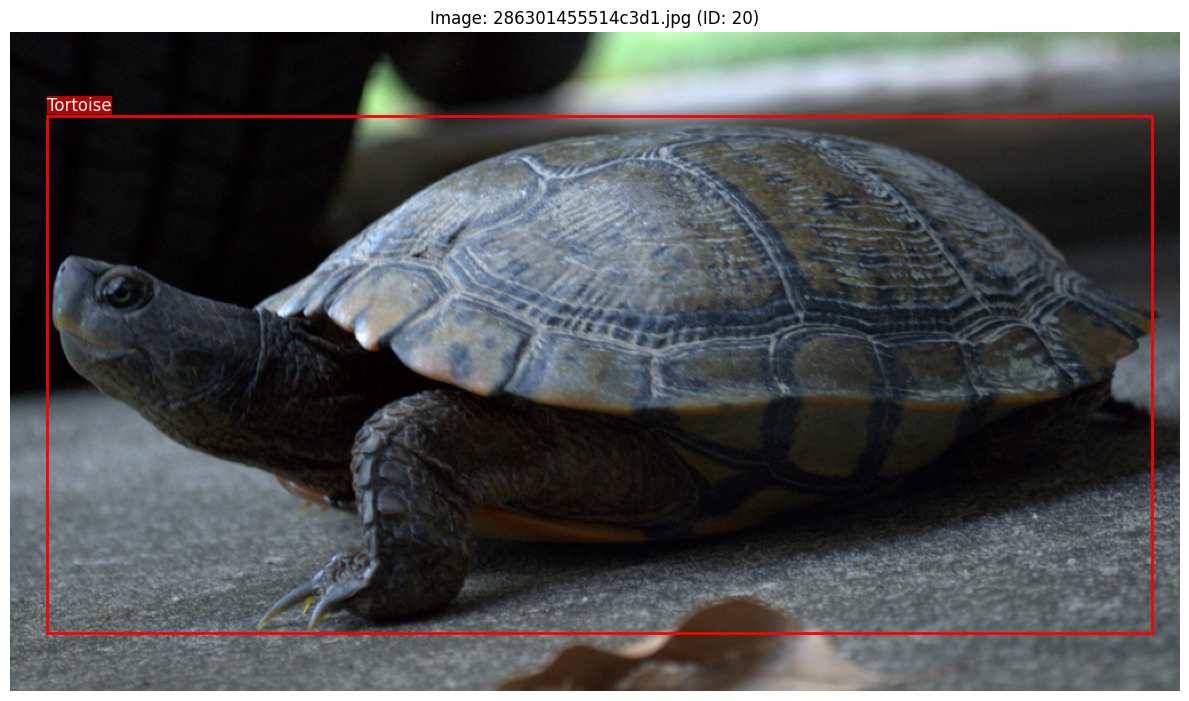

Found 1 annotations for 286301455514c3d1.jpg:
- Tortoise: [32, 73, 967, 453]


In [9]:
# plot an image
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def plot_coco_annotations(json_path, image_id_or_filename, image_dir=None):
    """
    Plot COCO annotations for a specific image.
    
    Args:
        json_path (str): Path to COCO format JSON file
        image_id_or_filename (str/int): Either:
            - Image filename (e.g., 'fd36bd3208918db7.jpg')
            - Image ID (integer)
        image_dir (str, optional): Directory containing images
    """
    # Load COCO annotations
    with open(json_path) as f:
        coco_data = json.load(f)
    
    # Find the image
    image_info = None
    if isinstance(image_id_or_filename, str):
        # Search by filename
        for img in coco_data['images']:
            if img['file_name'] == image_id_or_filename:
                image_info = img
                break
    else:
        # Search by ID
        for img in coco_data['images']:
            if img['id'] == image_id_or_filename:
                image_info = img
                break
    
    if not image_info:
        raise ValueError(f"Image {image_id_or_filename} not found in the dataset")
    
    # Load image
    if image_dir:
        img_path = os.path.join(image_dir, image_info['file_name'])
    else:
        img_path = image_info['file_name']
    
    try:
        image = np.array(Image.open(img_path))
    except FileNotFoundError:
        print(f"Warning: Image file {img_path} not found, plotting boxes without image")
        image = np.zeros((image_info['height'], image_info['width'], 3), dtype=np.uint8)
    
    # Get annotations for this image
    annotations = [ann for ann in coco_data['annotations'] 
                 if ann['image_id'] == image_info['id']]
    
    # Create category ID to name mapping
    cat_id_to_name = {cat['id']: cat['name'] for cat in coco_data['categories']}
    
    # Create plot
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)
    
    # Plot each annotation
    for ann in annotations:
        # Get box coordinates
        x, y, w, h = ann['bbox']
        
        # Create rectangle patch
        rect = patches.Rectangle(
            (x, y), w, h,
            linewidth=2,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add label
        label = f"{cat_id_to_name[ann['category_id']]}"
        ax.text(
            x, y - 5, label,
            color='white', fontsize=12,
            bbox=dict(facecolor='red', alpha=0.7, edgecolor='none', pad=0)
        )
    
    plt.title(f"Image: {image_info['file_name']} (ID: {image_info['id']})")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Print annotation summary
    print(f"Found {len(annotations)} annotations for {image_info['file_name']}:")
    for ann in annotations:
        print(f"- {cat_id_to_name[ann['category_id']]}: {ann['bbox']}")

# Example usage:
plot_coco_annotations(
    json_path="data/open-images-v7/train.json",
    image_id_or_filename=20, #"0a0a1faf68221297.jpg",
    image_dir="data/open-images-v7/train/"  # Optional if image paths in JSON are absolute
)
# the annotation is not precise, dont do that

# Train our model

## Prepare a config

Next is to prepare a config thus the dataset could be successfully loaded and parameters are suitable for our task.


In [10]:
# We need to set configs for our model
# First check what the default configs looks like
from mmengine import Config
# give the path of the configs of the model we choose
cfg = Config.fromfile('./configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
auto_scale_lr = dict(base_batch_size=16, enable=False)
backend_args = None
base_lr = 0.004
checkpoint = 'https://download.openmmlab.com/mmdetection/v3.0/rtmdet/cspnext_rsb_pretrain/cspnext-tiny_imagenet_600e.pth'
custom_hooks = [
    dict(
        ema_type='ExpMomentumEMA',
        momentum=0.0002,
        priority=49,
        type='EMAHook',
        update_buffers=True),
    dict(
        switch_epoch=280,
        switch_pipeline=[
            dict(backend_args=None, type='LoadImageFromFile'),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(
                keep_ratio=True,
                ratio_range=(
                    0.5,
                    2.0,
                ),
                scale=(
                    640,
                    640,
                ),
                type='RandomResize'),
            dict(crop_size=(
                640,
                640,
            ), type='RandomCrop'),
            dict(type='YOLOXHSVRandomAug'),
   

Looks carefully in the configs, identify what need to be revised to fit our model <br>
the layer of 'dict' is chained by a '.' <br>
Here are the list that need to be revised: <br>
 <br>
load_from&nbsp;&nbsp;&nbsp;&nbsp;#set pretrained model, usually preferred to start with pretrained model <br>
base_lr&nbsp;&nbsp;&nbsp;&nbsp;#learning rate, the default is for 8gpu, which maybe to large <br>
optim_wrapper.optimizer.lr&nbsp;&nbsp;&nbsp;&nbsp;#learning rate, the default is for 8gpu, which maybe to large <br>
 <br>
train_cfg.max_epochs&nbsp;&nbsp;&nbsp;&nbsp;#number of epoch, we needs less epoch for transfer learning <br>
stage2_num_epochs&nbsp;&nbsp;&nbsp;&nbsp;#number of epoch of second stage training when augmentation is less aggressive <br>
custom_hooks[1].switch_epoch&nbsp;&nbsp;&nbsp;&nbsp;#the epoch that switch to second stage <br>
train_cfg.val_interval&nbsp;&nbsp;&nbsp;&nbsp;#Runs validation every N epochs <br>
train_cfg.dynamic_intervals&nbsp;&nbsp;&nbsp;&nbsp;#changes the validation interval, after the x th epoch, validate every y epoch <br>
default_hooks.checkpoint.interval&nbsp;&nbsp;&nbsp;&nbsp;#Saves a checkpoint every N epochs <br>
default_hooks.logger.interval&nbsp;&nbsp;&nbsp;&nbsp;#Logs training info every N iterations <br>
 <br>
model.bbox_head.num_classes&nbsp;&nbsp;&nbsp;&nbsp;#number of class, we have 2 (tortoise and lizard) <br>
 <br>
param_scheduler[0].end&nbsp;&nbsp;&nbsp;&nbsp;#number of epoch or iteration of warmup <br>
param_scheduler[0].by_epoch&nbsp;&nbsp;&nbsp;&nbsp;#the above defined by epoch or iteration <br>
param_scheduler[1].T_max&nbsp;&nbsp;&nbsp;&nbsp;#total number of steps over annealing <br>
param_scheduler[1].begin&nbsp;&nbsp;&nbsp;&nbsp;#the epoch or iteration of when annealing begin <br>
param_scheduler[1].end&nbsp;&nbsp;&nbsp;&nbsp;#the epoch or iteration of when annealing end <br>
param_scheduler[1].convert_to_iter_based&nbsp;&nbsp;&nbsp;&nbsp;#the above defined by epoch or iteration <br>
param_scheduler[1].eta_min&nbsp;&nbsp;&nbsp;&nbsp;#minimum learning rate cosine annealing decay to <br>
 <br>
data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
train_dataloader.dataset.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#name of training set annotation json <br>
train_dataloader.dataset.data_prefix&nbsp;&nbsp;&nbsp;&nbsp;#folder of storing training set images <br>
train_dataloader.dataset.data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
train_dataloader.dataset.metainfo&nbsp;&nbsp;&nbsp;&nbsp;#metainfo of our dataset <br>
val_dataloader.dataset.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#name of validation set annotation json <br>
val_dataloader.dataset.data_prefix&nbsp;&nbsp;&nbsp;&nbsp;#folder of storing validation set images <br>
val_dataloader.dataset.data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
val_dataloader.dataset.metainfo&nbsp;&nbsp;&nbsp;&nbsp;#metainfo of our dataset <br>
test_dataloader.dataset.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#name of testing set annotation json <br>
test_dataloader.dataset.data_prefix&nbsp;&nbsp;&nbsp;&nbsp;#folder of storing testing set images <br>
test_dataloader.dataset.data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
test_dataloader.dataset.metainfo&nbsp;&nbsp;&nbsp;&nbsp;#metainfo of our dataset <br>
val_evaluator.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#locatio and name of validation set annotation json <br>
test_evaluator.ann_file&nbsp;&nbsp;&nbsp;&nbsp;##locatio and name of testing set annotation json <br>
 <br>
train_dataloader.batch_size&nbsp;&nbsp;&nbsp;&nbsp;#set a batch size that fits your gpu <br>
val_dataloader.batch_size&nbsp;&nbsp;&nbsp;&nbsp;#set a batch size that fits your gpu <br>
test_dataloader.batch_size&nbsp;&nbsp;&nbsp;&nbsp;#set a batch size that fits your gpu <br>
 <br>
for configs explanation, you can refer to <br>
https://mmdetection.readthedocs.io/en/stable/user_guides/config.html <br>
for more augmentation, you can refer to <br>
https://mmdetection.readthedocs.io/en/v2.19.1/tutorials/data_pipeline.html <br>
https://mmdetection.readthedocs.io/en/v2.16.0/_modules/mmdet/datasets/pipelines/transforms.html <br>
for mixup and mosaic <br>
https://mmdetection.readthedocs.io/en/latest/advanced_guides/how_to.html#use-mosaic-augmentation <br>

In [11]:
metainfo = {
    'classes': ('Lizard', 'Tortoise',), # names of classes, stick to the json, no spelling mistake allowed
    'palette': [              # any color you want
        (220, 0, 0), (0, 220, 0),
    ]
}

cfg.load_from = './checkpoint/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
cfg.base_lr = 0.0001 #cfg.base_lr/8 #set it to default/8 maybe enough, you can increase if find it too small
cfg.optim_wrapper.optimizer.lr = 0.0001 #cfg.optim_wrapper.optimizer.lr/8 #set it to default/8 maybe enough, you can increase if find it too small

cfg.max_epochs = 60
cfg.train_cfg.max_epochs = 60
cfg.stage2_num_epochs = 10
cfg.custom_hooks[1].switch_epoch = 50
cfg.train_cfg.val_interval = 5
cfg.train_cfg.dynamic_intervals = [(50,1),]
cfg.default_hooks.checkpoint.interval = 5
cfg.default_hooks.checkpoint.save_best = 'auto' #save best checkpoint
cfg.default_hooks.logger.interval = 5

cfg.model.bbox_head.num_classes = 2

cfg.param_scheduler[0].end = 10
cfg.param_scheduler[0].by_epoch = True
cfg.param_scheduler[1].T_max = 50
cfg.param_scheduler[1].begin = 10
cfg.param_scheduler[1].end = 60
cfg.param_scheduler[1].convert_to_iter_based = False
cfg.param_scheduler[1].eta_min = cfg.base_lr*0.1

cfg.data_root = 'data/open-images-v7/'
cfg.train_dataloader.dataset.ann_file = 'train.json'
cfg.train_dataloader.dataset.data_prefix = dict(img='train/')
cfg.train_dataloader.dataset.data_root = 'data/open-images-v7/'
cfg.train_dataloader.dataset.metainfo = metainfo
cfg.val_dataloader.dataset.ann_file = 'val.json'
cfg.val_dataloader.dataset.data_prefix = dict(img='val/')
cfg.val_dataloader.dataset.data_root = 'data/open-images-v7/'
cfg.val_dataloader.dataset.metainfo = metainfo
cfg.test_dataloader.dataset.ann_file = 'val.json'
cfg.test_dataloader.dataset.data_prefix = dict(img='val/')
cfg.test_dataloader.dataset.data_root = 'data/open-images-v7/'
cfg.test_dataloader.dataset.metainfo = metainfo
cfg.val_evaluator.ann_file = cfg.data_root + 'val.json'
cfg.test_evaluator.ann_file = cfg.data_root + 'val.json'

cfg.train_dataloader.batch_size = 8
cfg.val_dataloader.batch_size = 8
cfg.test_dataloader.batch_size = 8

#------------------------------------------------------
# create a new config.py with a suffix
config=f'./configs/rtmdet/rtmdet_tiny_8xb32-300e_coco_turnliz.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

# start training !!
revise the name of .py for your own project

In [12]:
%run tools/train.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco_turnliz.py

06/27 11:35:39 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 2066395473
    GPU 0: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda-12.8
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compute_75,co

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:35:45 - mmengine - INFO - Epoch(train)  [1][  5/395]  base_lr: 1.0000e-09 lr: 1.0000e-09  eta: 2:31:08  time: 0.3827  data_time: 0.1882  memory: 2586  loss: 2.5370  loss_cls: 1.7570  loss_bbox: 0.7800
06/27 11:35:45 - mmengine - INFO - Epoch(train)  [1][ 10/395]  base_lr: 1.0000e-09 lr: 1.0000e-09  eta: 1:30:24  time: 0.2290  data_time: 0.0950  memory: 2589  loss: 2.5333  loss_cls: 1.7542  loss_bbox: 0.7790
06/27 11:35:45 - mmengine - INFO - Epoch(train)  [1][ 15/395]  base_lr: 1.0000e-09 lr: 1.0000e-09  eta: 1:09:39  time: 0.1765  data_time: 0.0638  memory: 2586  loss: 2.5279  loss_cls: 1.7437  loss_bbox: 0.7843
06/27 11:35:46 - mmengine - INFO - Epoch(train)  [1][ 20/395]  base_lr: 1.0000e-09 lr: 1.0000e-09  eta: 0:59:03  time: 0.1496  data_time: 0.0482  memory: 2597  loss: 2.5313  loss_cls: 1.7458  loss_bbox: 0.7855
06/27 11:35:46 - mmengine - INFO - Epoch(train)  [1][ 25/395]  base_lr: 1.0000e-09 lr: 1.0000e-09  eta: 0:52:56  time: 0.1342  data_time: 0.0388  memory: 2587  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:38:36 - mmengine - INFO - Epoch(val)  [5][ 5/18]    eta: 0:00:01  time: 0.1490  data_time: 0.1082  memory: 399  
06/27 11:38:36 - mmengine - INFO - Epoch(val)  [5][10/18]    eta: 0:00:00  time: 0.0947  data_time: 0.0551  memory: 399  
06/27 11:38:36 - mmengine - INFO - Epoch(val)  [5][15/18]    eta: 0:00:00  time: 0.0782  data_time: 0.0392  memory: 399  
06/27 11:38:36 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.30s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.631
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.839
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.719
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:38:41 - mmengine - INFO - Epoch(train)  [6][  5/395]  base_lr: 5.5556e-05 lr: 5.5556e-05  eta: 0:31:37  time: 0.1134  data_time: 0.0120  memory: 2587  loss: 1.1657  loss_cls: 0.7686  loss_bbox: 0.3971
06/27 11:38:43 - mmengine - INFO - Epoch(train)  [6][ 10/395]  base_lr: 5.5556e-05 lr: 5.5556e-05  eta: 0:31:54  time: 0.1419  data_time: 0.0124  memory: 2586  loss: 1.1699  loss_cls: 0.7727  loss_bbox: 0.3972
06/27 11:38:44 - mmengine - INFO - Epoch(train)  [6][ 15/395]  base_lr: 5.5556e-05 lr: 5.5556e-05  eta: 0:31:59  time: 0.1480  data_time: 0.0125  memory: 2586  loss: 1.1736  loss_cls: 0.7748  loss_bbox: 0.3989
06/27 11:38:44 - mmengine - INFO - Epoch(train)  [6][ 20/395]  base_lr: 5.5556e-05 lr: 5.5556e-05  eta: 0:32:00  time: 0.1484  data_time: 0.0125  memory: 2586  loss: 1.1710  loss_cls: 0.7719  loss_bbox: 0.3991
06/27 11:38:45 - mmengine - INFO - Exp name: rtmdet_tiny_8xb32-300e_coco_turnliz_20250627_113538
06/27 11:38:45 - mmengine - INFO - Epoch(train)  [6][ 25/395]  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:42:02 - mmengine - INFO - Epoch(val) [10][10/18]    eta: 0:00:00  time: 0.0630  data_time: 0.0250  memory: 399  
06/27 11:42:02 - mmengine - INFO - Epoch(val) [10][15/18]    eta: 0:00:00  time: 0.0600  data_time: 0.0225  memory: 399  
06/27 11:42:03 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.730
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.932
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.822
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.045
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.736
 Average 

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:42:06 - mmengine - INFO - Epoch(train) [11][  5/395]  base_lr: 1.0000e-04 lr: 1.0000e-04  eta: 0:31:09  time: 0.1125  data_time: 0.0132  memory: 2588  loss: 0.9037  loss_cls: 0.5665  loss_bbox: 0.3373
06/27 11:42:08 - mmengine - INFO - Epoch(train) [11][ 10/395]  base_lr: 1.0000e-04 lr: 1.0000e-04  eta: 0:31:16  time: 0.1473  data_time: 0.0136  memory: 2586  loss: 0.9032  loss_cls: 0.5638  loss_bbox: 0.3394
06/27 11:42:09 - mmengine - INFO - Epoch(train) [11][ 15/395]  base_lr: 1.0000e-04 lr: 1.0000e-04  eta: 0:31:18  time: 0.1585  data_time: 0.0138  memory: 2589  loss: 0.8995  loss_cls: 0.5605  loss_bbox: 0.3389
06/27 11:42:10 - mmengine - INFO - Epoch(train) [11][ 20/395]  base_lr: 1.0000e-04 lr: 1.0000e-04  eta: 0:31:19  time: 0.1628  data_time: 0.0138  memory: 2587  loss: 0.9096  loss_cls: 0.5650  loss_bbox: 0.3445
06/27 11:42:11 - mmengine - INFO - Epoch(train) [11][ 25/395]  base_lr: 1.0000e-04 lr: 1.0000e-04  eta: 0:31:18  time: 0.1611  data_time: 0.0138  memory: 2586  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:45:28 - mmengine - INFO - Epoch(val) [15][ 5/18]    eta: 0:00:00  time: 0.0578  data_time: 0.0205  memory: 399  
06/27 11:45:28 - mmengine - INFO - Epoch(val) [15][10/18]    eta: 0:00:00  time: 0.0558  data_time: 0.0185  memory: 399  
06/27 11:45:28 - mmengine - INFO - Epoch(val) [15][15/18]    eta: 0:00:00  time: 0.0443  data_time: 0.0076  memory: 399  
06/27 11:45:29 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.764
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.948
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.866
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:45:33 - mmengine - INFO - Epoch(train) [16][  5/395]  base_lr: 9.7798e-05 lr: 9.7798e-05  eta: 0:28:46  time: 0.1053  data_time: 0.0133  memory: 2591  loss: 0.8684  loss_cls: 0.5276  loss_bbox: 0.3409
06/27 11:45:34 - mmengine - INFO - Epoch(train) [16][ 10/395]  base_lr: 9.7798e-05 lr: 9.7798e-05  eta: 0:28:49  time: 0.1341  data_time: 0.0136  memory: 2588  loss: 0.8810  loss_cls: 0.5348  loss_bbox: 0.3462
06/27 11:45:35 - mmengine - INFO - Epoch(train) [16][ 15/395]  base_lr: 9.7798e-05 lr: 9.7798e-05  eta: 0:28:50  time: 0.1445  data_time: 0.0137  memory: 2586  loss: 0.8745  loss_cls: 0.5305  loss_bbox: 0.3441
06/27 11:45:36 - mmengine - INFO - Epoch(train) [16][ 20/395]  base_lr: 9.7798e-05 lr: 9.7798e-05  eta: 0:28:50  time: 0.1486  data_time: 0.0137  memory: 2587  loss: 0.8791  loss_cls: 0.5337  loss_bbox: 0.3454
06/27 11:45:36 - mmengine - INFO - Epoch(train) [16][ 25/395]  base_lr: 9.7798e-05 lr: 9.7798e-05  eta: 0:28:49  time: 0.1489  data_time: 0.0137  memory: 2586  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:48:56 - mmengine - INFO - Epoch(val) [20][10/18]    eta: 0:00:00  time: 0.0447  data_time: 0.0084  memory: 399  
06/27 11:48:56 - mmengine - INFO - Epoch(val) [20][15/18]    eta: 0:00:00  time: 0.0433  data_time: 0.0074  memory: 399  
06/27 11:48:56 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.27s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.786
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.947
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.794
 Average 

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:49:00 - mmengine - INFO - Epoch(train) [21][  5/395]  base_lr: 9.1406e-05 lr: 9.1406e-05  eta: 0:25:56  time: 0.1031  data_time: 0.0131  memory: 2586  loss: 0.8234  loss_cls: 0.4929  loss_bbox: 0.3305
06/27 11:49:01 - mmengine - INFO - Epoch(train) [21][ 10/395]  base_lr: 9.1406e-05 lr: 9.1406e-05  eta: 0:25:57  time: 0.1143  data_time: 0.0132  memory: 2587  loss: 0.8175  loss_cls: 0.4889  loss_bbox: 0.3286
06/27 11:49:02 - mmengine - INFO - Epoch(train) [21][ 15/395]  base_lr: 9.1406e-05 lr: 9.1406e-05  eta: 0:25:58  time: 0.1328  data_time: 0.0135  memory: 2588  loss: 0.8083  loss_cls: 0.4845  loss_bbox: 0.3238
06/27 11:49:03 - mmengine - INFO - Epoch(train) [21][ 20/395]  base_lr: 9.1406e-05 lr: 9.1406e-05  eta: 0:25:58  time: 0.1317  data_time: 0.0135  memory: 2589  loss: 0.7931  loss_cls: 0.4747  loss_bbox: 0.3184
06/27 11:49:03 - mmengine - INFO - Epoch(train) [21][ 25/395]  base_lr: 9.1406e-05 lr: 9.1406e-05  eta: 0:25:57  time: 0.1278  data_time: 0.0135  memory: 2588  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:52:20 - mmengine - INFO - Epoch(val) [25][ 5/18]    eta: 0:00:00  time: 0.0450  data_time: 0.0090  memory: 399  
06/27 11:52:21 - mmengine - INFO - Epoch(val) [25][10/18]    eta: 0:00:00  time: 0.0445  data_time: 0.0084  memory: 399  
06/27 11:52:21 - mmengine - INFO - Epoch(val) [25][15/18]    eta: 0:00:00  time: 0.0436  data_time: 0.0076  memory: 399  
06/27 11:52:21 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.29s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.788
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.947
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.888
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:52:26 - mmengine - INFO - Epoch(train) [26][  5/395]  base_lr: 8.1450e-05 lr: 8.1450e-05  eta: 0:22:51  time: 0.1226  data_time: 0.0128  memory: 2589  loss: 0.8370  loss_cls: 0.4913  loss_bbox: 0.3457
06/27 11:52:28 - mmengine - INFO - Epoch(train) [26][ 10/395]  base_lr: 8.1450e-05 lr: 8.1450e-05  eta: 0:22:52  time: 0.1497  data_time: 0.0131  memory: 2588  loss: 0.8343  loss_cls: 0.4925  loss_bbox: 0.3418
06/27 11:52:29 - mmengine - INFO - Epoch(train) [26][ 15/395]  base_lr: 8.1450e-05 lr: 8.1450e-05  eta: 0:22:52  time: 0.1583  data_time: 0.0132  memory: 2586  loss: 0.8349  loss_cls: 0.4933  loss_bbox: 0.3416
06/27 11:52:29 - mmengine - INFO - Epoch(train) [26][ 20/395]  base_lr: 8.1450e-05 lr: 8.1450e-05  eta: 0:22:52  time: 0.1605  data_time: 0.0132  memory: 2586  loss: 0.8280  loss_cls: 0.4893  loss_bbox: 0.3387
06/27 11:52:29 - mmengine - INFO - Epoch(train) [26][ 25/395]  base_lr: 8.1450e-05 lr: 8.1450e-05  eta: 0:22:51  time: 0.1603  data_time: 0.0131  memory: 2588  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:55:52 - mmengine - INFO - Epoch(val) [30][ 5/18]    eta: 0:00:00  time: 0.0447  data_time: 0.0089  memory: 399  
06/27 11:55:52 - mmengine - INFO - Epoch(val) [30][10/18]    eta: 0:00:00  time: 0.0442  data_time: 0.0084  memory: 399  
06/27 11:55:52 - mmengine - INFO - Epoch(val) [30][15/18]    eta: 0:00:00  time: 0.0431  data_time: 0.0074  memory: 399  
06/27 11:55:53 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.804
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.947
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.890
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:55:57 - mmengine - INFO - Epoch(train) [31][  5/395]  base_lr: 6.8906e-05 lr: 6.8906e-05  eta: 0:19:45  time: 0.1230  data_time: 0.0180  memory: 2587  loss: 0.8167  loss_cls: 0.4790  loss_bbox: 0.3377
06/27 11:55:58 - mmengine - INFO - Epoch(train) [31][ 10/395]  base_lr: 6.8906e-05 lr: 6.8906e-05  eta: 0:19:46  time: 0.1463  data_time: 0.0184  memory: 2587  loss: 0.8009  loss_cls: 0.4650  loss_bbox: 0.3359
06/27 11:55:59 - mmengine - INFO - Epoch(train) [31][ 15/395]  base_lr: 6.8906e-05 lr: 6.8906e-05  eta: 0:19:46  time: 0.1509  data_time: 0.0185  memory: 2590  loss: 0.7952  loss_cls: 0.4625  loss_bbox: 0.3327
06/27 11:56:00 - mmengine - INFO - Epoch(train) [31][ 20/395]  base_lr: 6.8906e-05 lr: 6.8906e-05  eta: 0:19:45  time: 0.1479  data_time: 0.0185  memory: 2586  loss: 0.7901  loss_cls: 0.4610  loss_bbox: 0.3291
06/27 11:56:00 - mmengine - INFO - Epoch(train) [31][ 25/395]  base_lr: 6.8906e-05 lr: 6.8906e-05  eta: 0:19:45  time: 0.1424  data_time: 0.0185  memory: 2588  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:59:25 - mmengine - INFO - Epoch(val) [35][10/18]    eta: 0:00:00  time: 0.0440  data_time: 0.0083  memory: 399  
06/27 11:59:25 - mmengine - INFO - Epoch(val) [35][15/18]    eta: 0:00:00  time: 0.0430  data_time: 0.0075  memory: 399  
06/27 11:59:26 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.806
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.951
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.905
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.014
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.815
 Average 

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 11:59:30 - mmengine - INFO - Epoch(train) [36][  5/395]  base_lr: 5.5000e-05 lr: 5.5000e-05  eta: 0:16:36  time: 0.1290  data_time: 0.0134  memory: 2592  loss: 0.7559  loss_cls: 0.4356  loss_bbox: 0.3204
06/27 11:59:32 - mmengine - INFO - Epoch(train) [36][ 10/395]  base_lr: 5.5000e-05 lr: 5.5000e-05  eta: 0:16:36  time: 0.1619  data_time: 0.0143  memory: 2588  loss: 0.7660  loss_cls: 0.4414  loss_bbox: 0.3246
06/27 11:59:33 - mmengine - INFO - Epoch(train) [36][ 15/395]  base_lr: 5.5000e-05 lr: 5.5000e-05  eta: 0:16:36  time: 0.1713  data_time: 0.0144  memory: 2590  loss: 0.7671  loss_cls: 0.4422  loss_bbox: 0.3249
06/27 11:59:33 - mmengine - INFO - Epoch(train) [36][ 20/395]  base_lr: 5.5000e-05 lr: 5.5000e-05  eta: 0:16:35  time: 0.1726  data_time: 0.0143  memory: 2588  loss: 0.7706  loss_cls: 0.4453  loss_bbox: 0.3252
06/27 11:59:34 - mmengine - INFO - Epoch(train) [36][ 25/395]  base_lr: 5.5000e-05 lr: 5.5000e-05  eta: 0:16:35  time: 0.1715  data_time: 0.0143  memory: 2588  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 12:03:03 - mmengine - INFO - Epoch(val) [40][10/18]    eta: 0:00:00  time: 0.0437  data_time: 0.0084  memory: 399  
06/27 12:03:03 - mmengine - INFO - Epoch(val) [40][15/18]    eta: 0:00:00  time: 0.0431  data_time: 0.0078  memory: 399  
06/27 12:03:04 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.26s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.806
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.814
 Average 

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 12:06:37 - mmengine - INFO - Epoch(val) [45][ 5/18]    eta: 0:00:00  time: 0.0443  data_time: 0.0091  memory: 399  
06/27 12:06:37 - mmengine - INFO - Epoch(val) [45][10/18]    eta: 0:00:00  time: 0.0440  data_time: 0.0085  memory: 399  
06/27 12:06:38 - mmengine - INFO - Epoch(val) [45][15/18]    eta: 0:00:00  time: 0.0430  data_time: 0.0075  memory: 399  
06/27 12:06:38 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.27s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.811
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.953
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.889
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 12:06:43 - mmengine - INFO - Epoch(train) [46][  5/395]  base_lr: 2.8550e-05 lr: 2.8550e-05  eta: 0:10:06  time: 0.1236  data_time: 0.0143  memory: 2587  loss: 0.7233  loss_cls: 0.4100  loss_bbox: 0.3133
06/27 12:06:45 - mmengine - INFO - Epoch(train) [46][ 10/395]  base_lr: 2.8550e-05 lr: 2.8550e-05  eta: 0:10:06  time: 0.1550  data_time: 0.0147  memory: 2586  loss: 0.7235  loss_cls: 0.4110  loss_bbox: 0.3125
06/27 12:06:45 - mmengine - INFO - Epoch(train) [46][ 15/395]  base_lr: 2.8550e-05 lr: 2.8550e-05  eta: 0:10:05  time: 0.1629  data_time: 0.0148  memory: 2587  loss: 0.7214  loss_cls: 0.4104  loss_bbox: 0.3110
06/27 12:06:46 - mmengine - INFO - Epoch(train) [46][ 20/395]  base_lr: 2.8550e-05 lr: 2.8550e-05  eta: 0:10:05  time: 0.1667  data_time: 0.0149  memory: 2589  loss: 0.7143  loss_cls: 0.4077  loss_bbox: 0.3066
06/27 12:06:46 - mmengine - INFO - Epoch(train) [46][ 25/395]  base_lr: 2.8550e-05 lr: 2.8550e-05  eta: 0:10:04  time: 0.1671  data_time: 0.0149  memory: 2587  

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 12:10:04 - mmengine - INFO - Epoch(val) [50][ 5/18]    eta: 0:00:00  time: 0.0446  data_time: 0.0090  memory: 399  
06/27 12:10:05 - mmengine - INFO - Epoch(val) [50][10/18]    eta: 0:00:00  time: 0.0442  data_time: 0.0084  memory: 399  
06/27 12:10:05 - mmengine - INFO - Epoch(val) [50][15/18]    eta: 0:00:00  time: 0.0435  data_time: 0.0077  memory: 399  
06/27 12:10:06 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.29s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.804
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.951
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.874
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 12:12:42 - mmengine - INFO - Epoch(val) [55][ 5/18]    eta: 0:00:00  time: 0.0453  data_time: 0.0092  memory: 399  
06/27 12:12:42 - mmengine - INFO - Epoch(val) [55][10/18]    eta: 0:00:00  time: 0.0448  data_time: 0.0086  memory: 399  
06/27 12:12:43 - mmengine - INFO - Epoch(val) [55][15/18]    eta: 0:00:00  time: 0.0441  data_time: 0.0078  memory: 399  
06/27 12:12:43 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.34s).
Accumulating evaluation results...
DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.807
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.948
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.883
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 12:15:24 - mmengine - INFO - Epoch(val) [60][10/18]    eta: 0:00:00  time: 0.0455  data_time: 0.0084  memory: 399  
06/27 12:15:25 - mmengine - INFO - Epoch(val) [60][15/18]    eta: 0:00:00  time: 0.0445  data_time: 0.0076  memory: 399  
06/27 12:15:25 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.30s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.813
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.951
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.898
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.822
 Average 

In [13]:
import torch
#after training/testing, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

# plot learning curve

In [15]:
#Suppose we use the latest run for example
import os
def get_latest_config(base_dir):
    # Get top-level subdirectories in the base directory
    top_subdirs = [
        os.path.join(base_dir, d)
        for d in os.listdir(base_dir)
        if os.path.isdir(os.path.join(base_dir, d))
    ]
    # Sort subdirectories by create time (most recent first)
    top_subdirs.sort(key=os.path.getctime, reverse=True)
    #print(top_subdirs)
    for top_dir in top_subdirs:
        # Walk through the subdirectory tree
        for root, dirs, files in os.walk(top_dir):
            # Look for the specific path vis_data/scalars.json
            if "vis_data" in dirs:
                target = os.path.join(root, "vis_data", "scalars.json")
                if os.path.exists(target):
                    return target
    return None

latest_config = get_latest_config("work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/")
print(latest_config)

work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/20250627_113538/vis_data/scalars.json


plot curve of work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/20250627_113538/vis_data/scalars.json, metric is loss


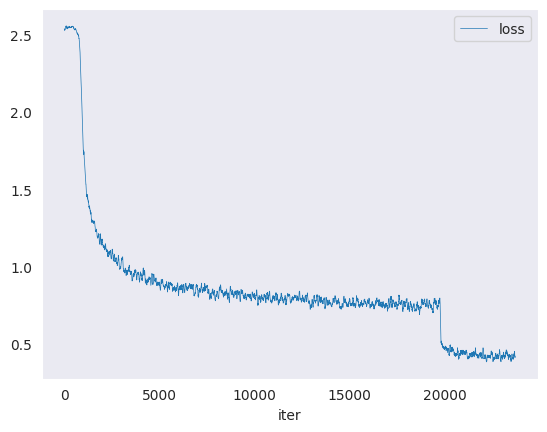

In [16]:
%run tools/analysis_tools/analyze_logs.py plot_curve {latest_config} --keys loss --legend loss

plot curve of work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/20250627_113538/vis_data/scalars.json, metric is bbox_mAP


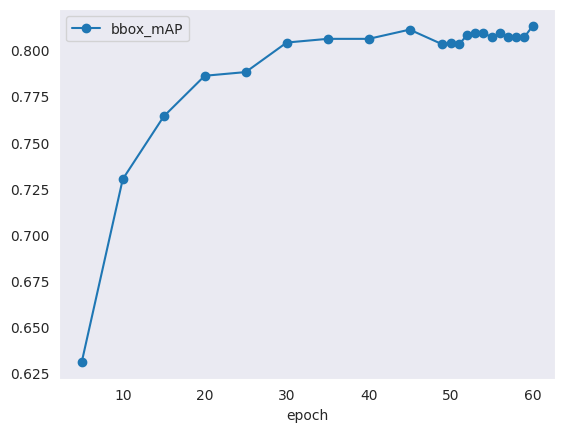

In [23]:
%run tools/analysis_tools/analyze_logs.py plot_curve {latest_config} --keys bbox_mAP --legend bbox_mAP

# Read the training log
Every epoch, the log prints current training status incluing Loss and learning rate(LR). <br>
and then current accuracy in bbox_mAP. <br>

In ideal scenario, training loss decreases and accuracy increases gradually throughout the training. <br> 
When it comes to the end of training, training loss would still decreases slightly, while accuracy stops improving, and it should be already satisfactory. <br>
 <br>
If training loss decreases and accuracy increases slowly, you may increase learning rate (eg double it) <br>
If both training loss and accuracy flutuate violently, you may decrease learning rate (eg half it) <br>
If accuracy is still improving at the end of training, you may increase number of epoch <br>
If training loss decreases while accuracy stagnates or worsens before getting satisfactory accuracy, you should add more samples or implement stronger augmentation, and ensure the two datasets are alike <br>
If both training loss and accuracy stagnates, and the accuracy is not satisfactory, you should consider choosing a more advanced or larger model <br>

# Augmentations

In our resnet sample, there is a simple augmentation strategy applied. As stated in <br>
train_pipeline:<br>
&nbsp;&nbsp;&nbsp;&nbsp;dict(img_scale=(640,640,),max_cached_images=20,pad_val=114.0,random_pop=False,type='CachedMosaic'),<br>
&nbsp;&nbsp;&nbsp;&nbsp;dict(keep_ratio=True,ratio_range=(0.5,2.0,),scale=(1280,1280,),type='RandomResize'),<br>
&nbsp;&nbsp;&nbsp;&nbsp;dict(crop_size=(640,640,), type='RandomCrop'),<br>

To create more augmentation, we can add it into train_pipeline <br>
for example, copy the below code and paste to the above script of training cfg, right above <br>
#------------------------------------------------------ <br>
config=f'./configs/rtmdet/rtmdet_tiny_8xb32-300e_coco_turnliz.py' <br>

for more augmentation, you can refer to <br>
https://mmdetection.readthedocs.io/en/stable/advanced_guides/transforms.html <br>
for more augmentation in Albumentations, you can refer to <br>
https://github.com/albumentations-team/albumentations <br>
You can view how images are augmented with the script below, the images are saved in the folder visualization/ <br>
You may stop it when you find samples are enough <br>

In [24]:
%run tools/analysis_tools/browse_dataset.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco_turnliz.py --output-dir ./visualization --not-show

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[                               ] 5/3157, 25.8 task/s, elapsed: 0s, ETA:   122s

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


[                              ] 22/3157, 22.6 task/s, elapsed: 1s, ETA:   139s

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/visualization/visualizer.py:508: UserWarning: Warning: The text is out of bounds, the drawn text may not be in the image
  warnings.warn(


[>>>>>>>>>>>>>>>>>>>>>>>>>>] 3157/3157, 21.6 task/s, elapsed: 146s, ETA:     0s

# Inference
Here we inference on a single image <br>

In [26]:
import os
import glob

def get_best_checkpoint(base_dir):
    best_ckpt = None
    latest_time = 0

    pattern = os.path.join(base_dir, "best_coco_bbox_mAP_*.pth")
    candidates = glob.glob(pattern)

    for ckpt_path in candidates:
        mtime = os.path.getmtime(ckpt_path)
        if mtime > latest_time:
            latest_time = mtime
            best_ckpt = ckpt_path

    return best_ckpt

best_ckpt = get_best_checkpoint("work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/")
print(f"Using best checkpoint: {best_ckpt}")

Using best checkpoint: work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/best_coco_bbox_mAP_epoch_60.pth


In [27]:
# here we demo how to use another approach to test
from mmdet.apis import DetInferencer

# Choose a config that we used for training
config = './configs/rtmdet/rtmdet_tiny_8xb32-300e_coco_turnliz.py'
# Setup a checkpoint file to load, input the location of best pth we trained
checkpoint = best_ckpt
# Set the device to be used for evaluation
device = 'cuda'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference, 
img = './data/open-images-v7/val/2b8f4f9aa64e8962.jpg'
result = inferencer(img, out_dir='./output', pred_score_thr=0.5)

Loads checkpoint by local backend from path: work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/best_coco_bbox_mAP_epoch_60.pth
06/27 14:06:55 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158:
FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 
instead.
  with torch.cuda.amp.autocast(enabled=False):

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.p
y:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', 
args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


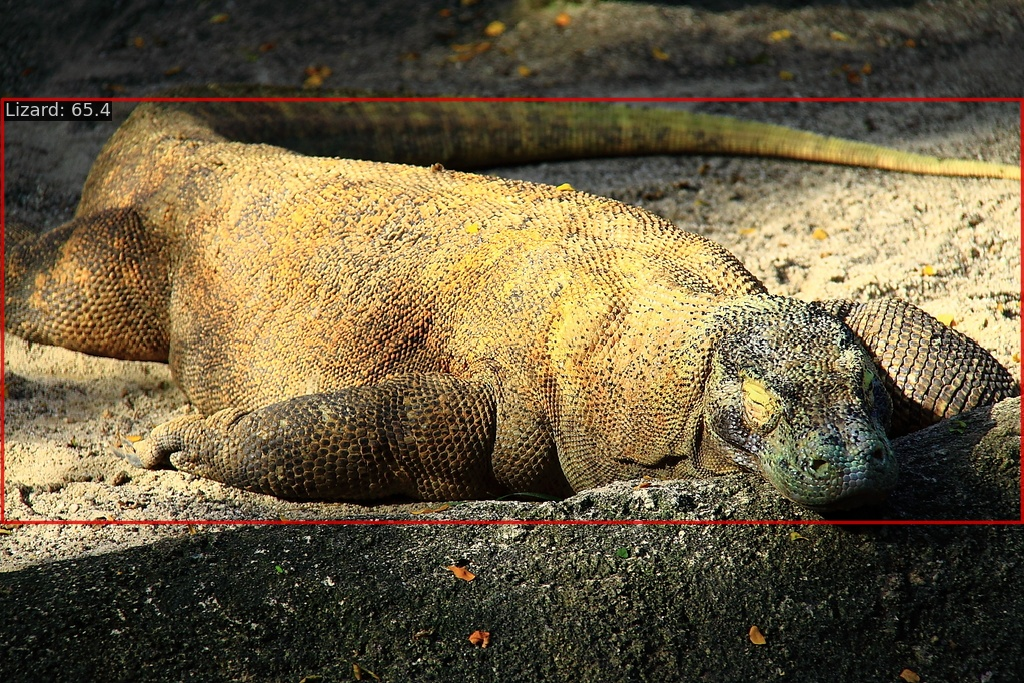

In [28]:
# Show the output image
from PIL import Image
Image.open('./output/vis/2b8f4f9aa64e8962.jpg')

# Validation
revise the name of .py and .pkl for your own project <br>
it will save the prediction of all samples in validation set in a pkl

In [29]:
%run tools/test.py work_dirs/rtmdet_tiny_8xb32-300e_coco_turnliz/rtmdet_tiny_8xb32-300e_coco_turnliz.py {best_ckpt} --out output/rtmdet_tiny_8xb32-300e_coco_turnliz.pkl

06/27 14:07:58 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 867413870
    GPU 0: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda-12.8
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compute_75,cod

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_RtmDet/mmdetection/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


06/27 14:08:02 - mmengine - INFO - Epoch(test) [10/18]    eta: 0:00:00  time: 0.0862  data_time: 0.0505  memory: 379  
06/27 14:08:02 - mmengine - INFO - Epoch(test) [15/18]    eta: 0:00:00  time: 0.0711  data_time: 0.0360  memory: 379  
06/27 14:08:02 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.29s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.24s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.813
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.951
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.898
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.822
 Average Recall

In [30]:
import torch
#after training/testing, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

In [31]:
# convert the pkl to json for plotting
import pickle
import json
import torch
import numpy as np

CONF_THRESHOLD = 0.01  # We set 0.01 to plot the below charts, or set your desired threshold here

# Load predictions
print("Loading predictions...")
with open('output/rtmdet_tiny_8xb32-300e_coco_turnliz.pkl', 'rb') as f:
    predictions = pickle.load(f)

# Print some debug info about the predictions
print(f"Loaded {len(predictions)} predictions")
print(f"First prediction structure: {type(predictions[0])}")

# Process the first prediction to understand its structure
sample = predictions[0]
print("\nSample prediction keys:", sample.keys() if isinstance(sample, dict) else "Not a dictionary")

if isinstance(sample, dict) and 'pred_instances' in sample:
    print("pred_instances keys:", sample['pred_instances'].keys())

    # Check if bboxes is a tensor
    if 'bboxes' in sample['pred_instances']:
        bbox_type = type(sample['pred_instances']['bboxes'])
        print(f"bboxes type: {bbox_type}")

        # If it's a tensor, check if tolist() method exists
        if hasattr(sample['pred_instances']['bboxes'], 'tolist'):
            print("bboxes has tolist() method")
        else:
            print("bboxes does NOT have tolist() method")

# Flattened output with proper error handling
output = []
for i, pred in enumerate(predictions):
    try:
        image_id = pred['img_id']

        if 'pred_instances' in pred:
            instances = pred['pred_instances']

            if all(k in instances for k in ['bboxes', 'labels', 'scores']):
                bboxes = instances['bboxes']
                labels = instances['labels']
                scores = instances['scores']

                if torch.is_tensor(bboxes):
                    bboxes = bboxes.numpy()
                if torch.is_tensor(labels):
                    labels = labels.numpy()
                if torch.is_tensor(scores):
                    scores = scores.numpy()

                for bbox, label, score in zip(bboxes, labels, scores):
                    if score >= CONF_THRESHOLD:
                        # Convert to list if needed
                        if not isinstance(bbox, list):
                            if hasattr(bbox, 'tolist'):
                                bbox = bbox.tolist()
                            else:
                                bbox = list(bbox)

                        # Convert [x1, y1, x2, y2] -> [x, y, width, height]
                        x1, y1, x2, y2 = bbox
                        width = x2 - x1
                        height = y2 - y1
                        coco_bbox = [float(x1), float(y1), float(width), float(height)]

                        output.append({
                            "image_id": int(image_id),
                            "category_id": int(label),
                            "bbox": coco_bbox,
                            "score": float(score)
                        })
    except Exception as e:
        print(f"Error processing prediction {i}: {e}")
        continue

# Verify output integrity
if output:
    print("\nSample output entry:")
    print(json.dumps(output[0], indent=2))

# Save to JSON
with open('coco_style_predictions.json', 'w') as f:
    json.dump(output, f, indent=2)

print(f"Saved {len(output)} predictions above {CONF_THRESHOLD} confidence to 'coco_style_predictions.json'")


Loading predictions...
Loaded 143 predictions
First prediction structure: <class 'dict'>

Sample prediction keys: dict_keys(['ori_shape', 'img_id', 'img_shape', 'scale_factor', 'pad_shape', 'batch_input_shape', 'img_path', 'pred_instances'])
pred_instances keys: dict_keys(['bboxes', 'labels', 'scores'])
bboxes type: <class 'torch.Tensor'>
bboxes has tolist() method

Sample output entry:
{
  "image_id": 0,
  "category_id": 0,
  "bbox": [
    198.789794921875,
    87.64545440673828,
    825.210205078125,
    586.536247253418
  ],
  "score": 0.9220244288444519
}
Saved 42900 predictions above 0.01 confidence to 'coco_style_predictions.json'


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


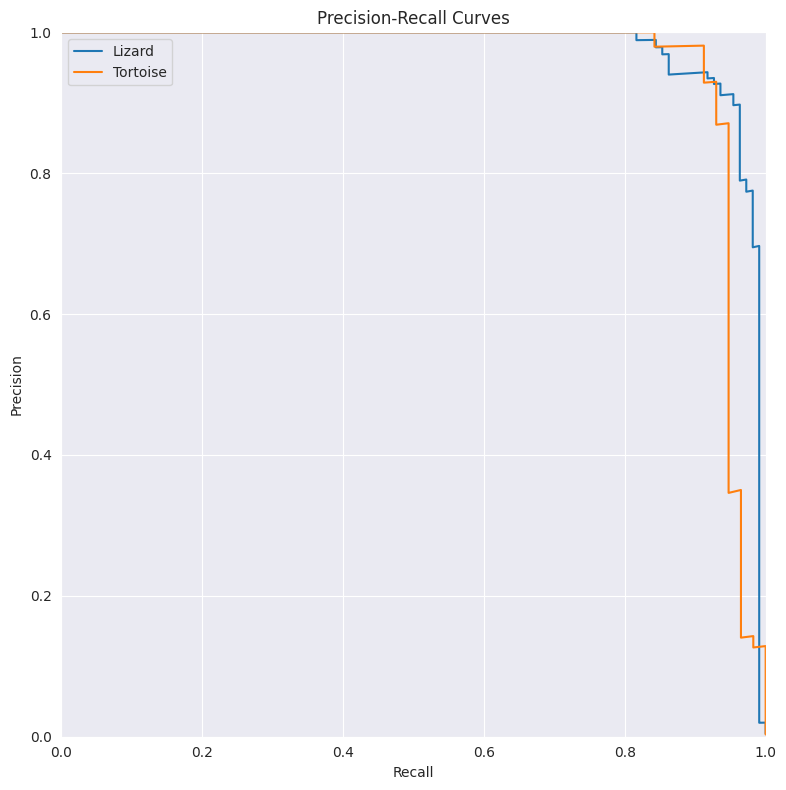

In [32]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from collections import defaultdict
from sklearn.metrics import precision_recall_curve

# Paths
truth_json = "data/open-images-v7/val.json"
pred_json = "coco_style_predictions.json"

# Load COCO GT and prediction JSONs
coco_gt = COCO(truth_json)
with open(pred_json, 'r') as f:
    predictions = json.load(f)

# Build category mapping
categories = coco_gt.loadCats(coco_gt.getCatIds())
cat_id_to_name = {cat['id']: cat['name'] for cat in categories}
cat_ids = list(cat_id_to_name.keys())

# Group predictions and GT annotations by category
preds_by_cat = defaultdict(list)
for pred in predictions:
    preds_by_cat[pred['category_id']].append(pred)

gt_by_cat = defaultdict(list)
for ann in coco_gt.dataset['annotations']:
    gt_by_cat[ann['category_id']].append(ann)

# Helper to compute IoU between two boxes
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]
    return interArea / (boxAArea + boxBArea - interArea + 1e-6)

# Compute precision-recall curves
iou_threshold = 0.5
class_curves = {}

for cat_id in cat_ids:
    y_true = []
    y_scores = []

    preds = sorted(preds_by_cat[cat_id], key=lambda x: -x['score'])
    gt_annots = gt_by_cat[cat_id]
    used = set()

    for pred in preds:
        pred_box = pred['bbox']
        image_id = pred['image_id']

        best_iou = iou_threshold
        best_gt_id = None
        for gt in gt_annots:
            if gt['image_id'] != image_id or gt['id'] in used:
                continue
            iou = compute_iou(pred_box, gt['bbox'])
            if iou > best_iou:
                best_iou = iou
                best_gt_id = gt['id']
        used.add(best_gt_id)
        y_true.append(1 if best_gt_id is not None else 0)
        y_scores.append(pred['score'])

    # Check if enough variation to compute curve
    if len(set(y_true)) < 2:
        print(f"Skipping {cat_id_to_name[cat_id]}: Not enough positives/negatives.")
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    class_curves[cat_id] = {
        'precision': precision,
        'recall': recall
    }

# ---- Plot Precision-Recall Curves ----
plt.figure(figsize=(10, 8))

for cat_id, data in class_curves.items():
    plt.plot(data['recall'], data['precision'], label=cat_id_to_name[cat_id])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig('precision_recall_curves.png', bbox_inches='tight', dpi=300)
plt.show()


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


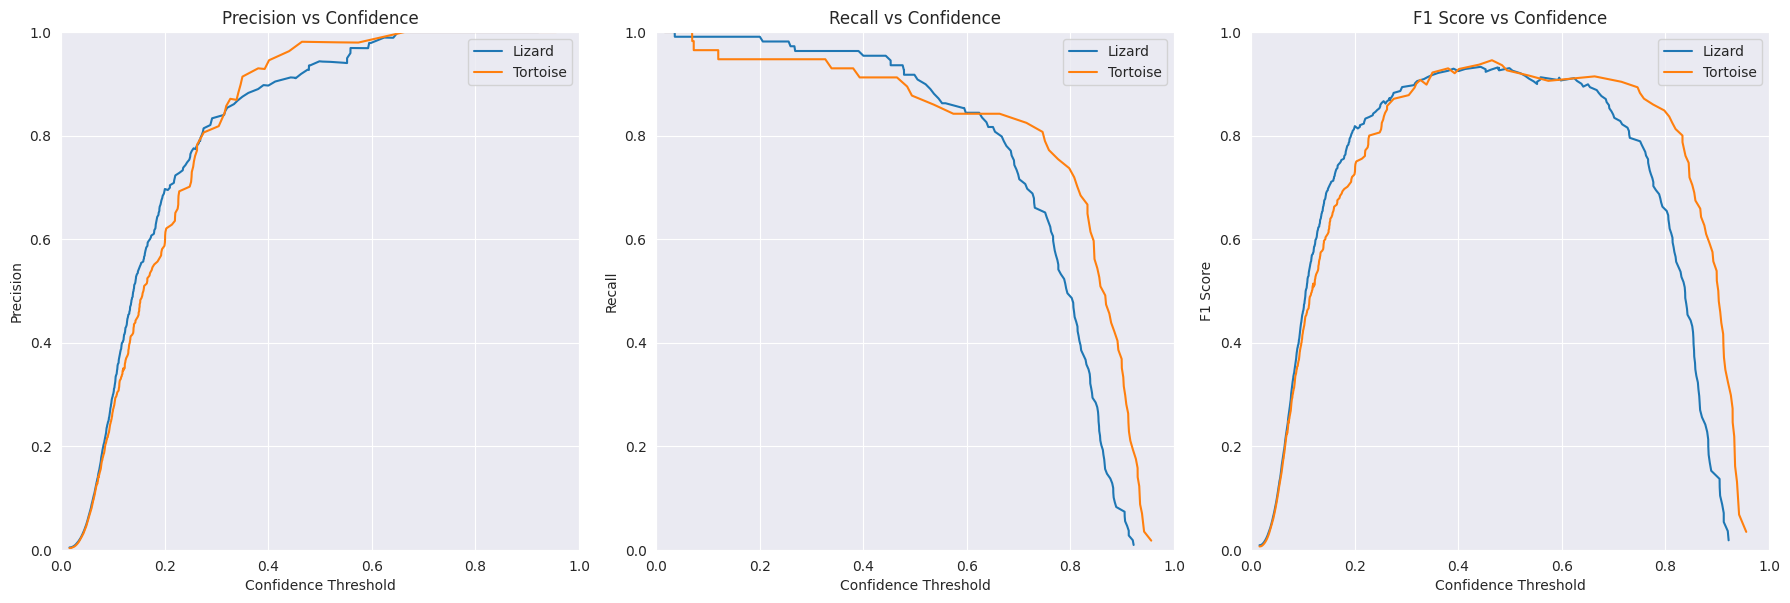

In [33]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from collections import defaultdict
from sklearn.metrics import precision_recall_curve

# Load annotations and predictions
truth_json = "data/open-images-v7/val.json"
pred_json = "coco_style_predictions.json"

# Load COCO GT and prediction JSONs
coco_gt = COCO(truth_json)
with open(pred_json, 'r') as f:
    predictions = json.load(f)

# Get category ID to name mapping
categories = coco_gt.loadCats(coco_gt.getCatIds())
cat_id_to_name = {cat['id']: cat['name'] for cat in categories}
cat_ids = list(cat_id_to_name.keys())

# Group predictions by category
preds_by_cat = defaultdict(list)
for pred in predictions:
    preds_by_cat[pred['category_id']].append(pred)

# Group GT annotations by category
gt_by_cat = defaultdict(list)
for ann in coco_gt.dataset['annotations']:
    gt_by_cat[ann['category_id']].append(ann)

def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]
    return interArea / (boxAArea + boxBArea - interArea + 1e-6)

iou_threshold = 0.5
class_curves = {}

for cat_id in cat_ids:
    y_true = []
    y_scores = []

    preds = sorted(preds_by_cat[cat_id], key=lambda x: -x['score'])
    gt_annots = gt_by_cat[cat_id]
    used = set()

    for pred in preds:
        pred_box = pred['bbox']
        image_id = pred['image_id']

        best_iou = iou_threshold
        best_gt_id = None
        for gt in gt_annots:
            if gt['image_id'] != image_id or gt['id'] in used:
                continue
            iou = compute_iou(pred_box, gt['bbox'])
            if iou > best_iou:
                best_iou = iou
                best_gt_id = gt['id']
        used.add(best_gt_id)
        y_true.append(1 if best_gt_id is not None else 0)
        y_scores.append(pred['score'])

    if len(set(y_true)) < 2:
        if sum(y_true) == 0:
            print(f"Class {cat_id_to_name[cat_id]} has ALL FALSE POSITIVES (no TP).")
        else:
            print(f"Class {cat_id_to_name[cat_id]} has ALL TRUE POSITIVES (no FP).")
        continue

    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    class_curves[cat_id] = {
        'precision': precision,
        'recall': recall,
        'thresholds': thresholds
    }

# Plotting
plt.figure(figsize=(18, 6))

# 1. Precision-Confidence
plt.subplot(1, 3, 1)
for cat_id, data in class_curves.items():
    plt.plot(data['thresholds'], data['precision'][:-1], 
             label=cat_id_to_name[cat_id])
plt.xlabel('Confidence Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Confidence')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

# 2. Recall-Confidence
plt.subplot(1, 3, 2)
for cat_id, data in class_curves.items():
    plt.plot(data['thresholds'], data['recall'][:-1], 
             label=cat_id_to_name[cat_id])
plt.xlabel('Confidence Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Confidence')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

# 3. NEW: F1-Confidence
plt.subplot(1, 3, 3)
for cat_id, data in class_curves.items():
    # Calculate F1 scores
    precision = data['precision'][:-1]
    recall = data['recall'][:-1]
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    
    plt.plot(data['thresholds'], f1_scores, 
             label=cat_id_to_name[cat_id])

plt.xlabel('Confidence Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Confidence')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.tight_layout()
#plt.savefig('precision_recall_f1_confidence.png', bbox_inches='tight', dpi=300)
plt.show()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!


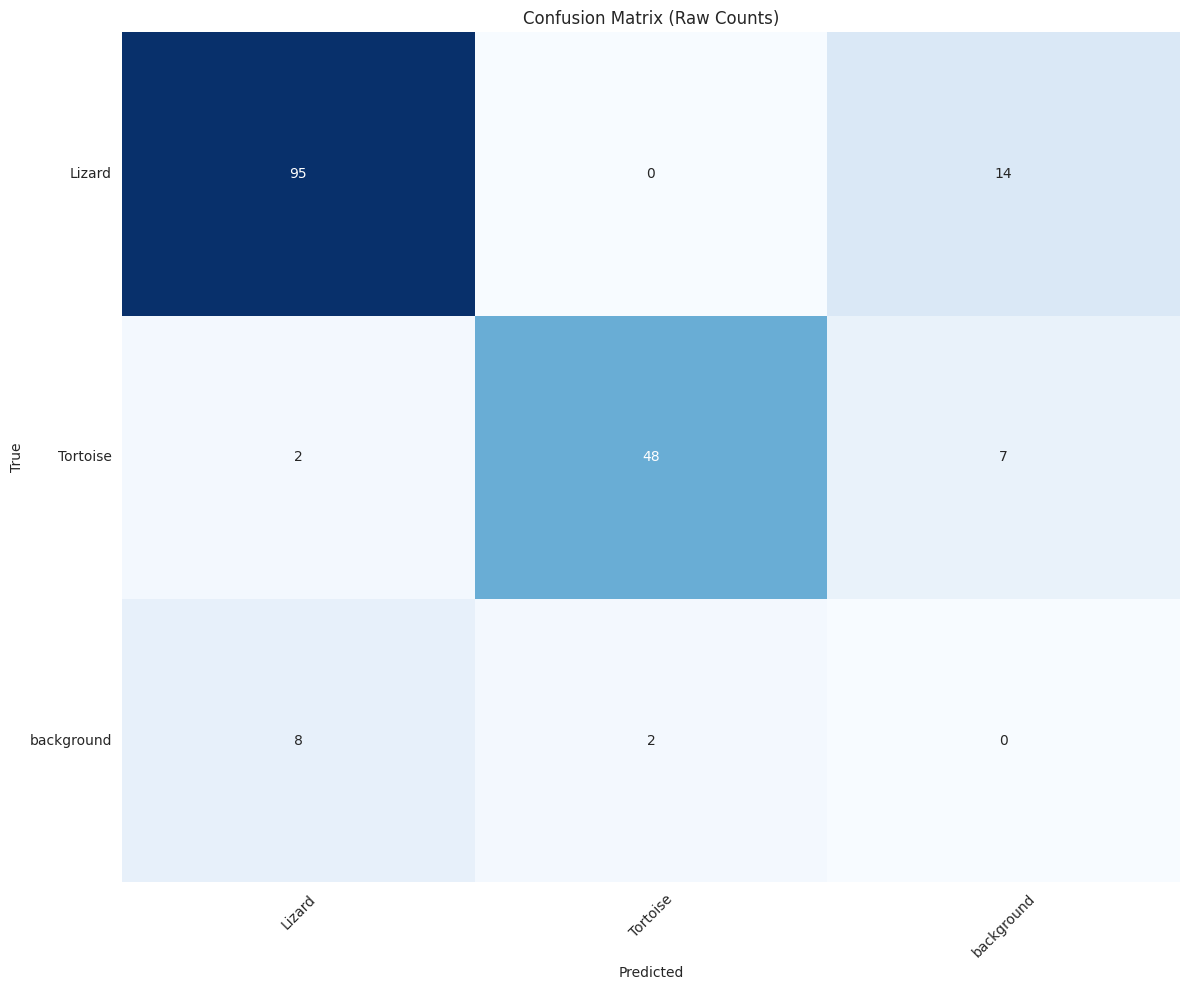

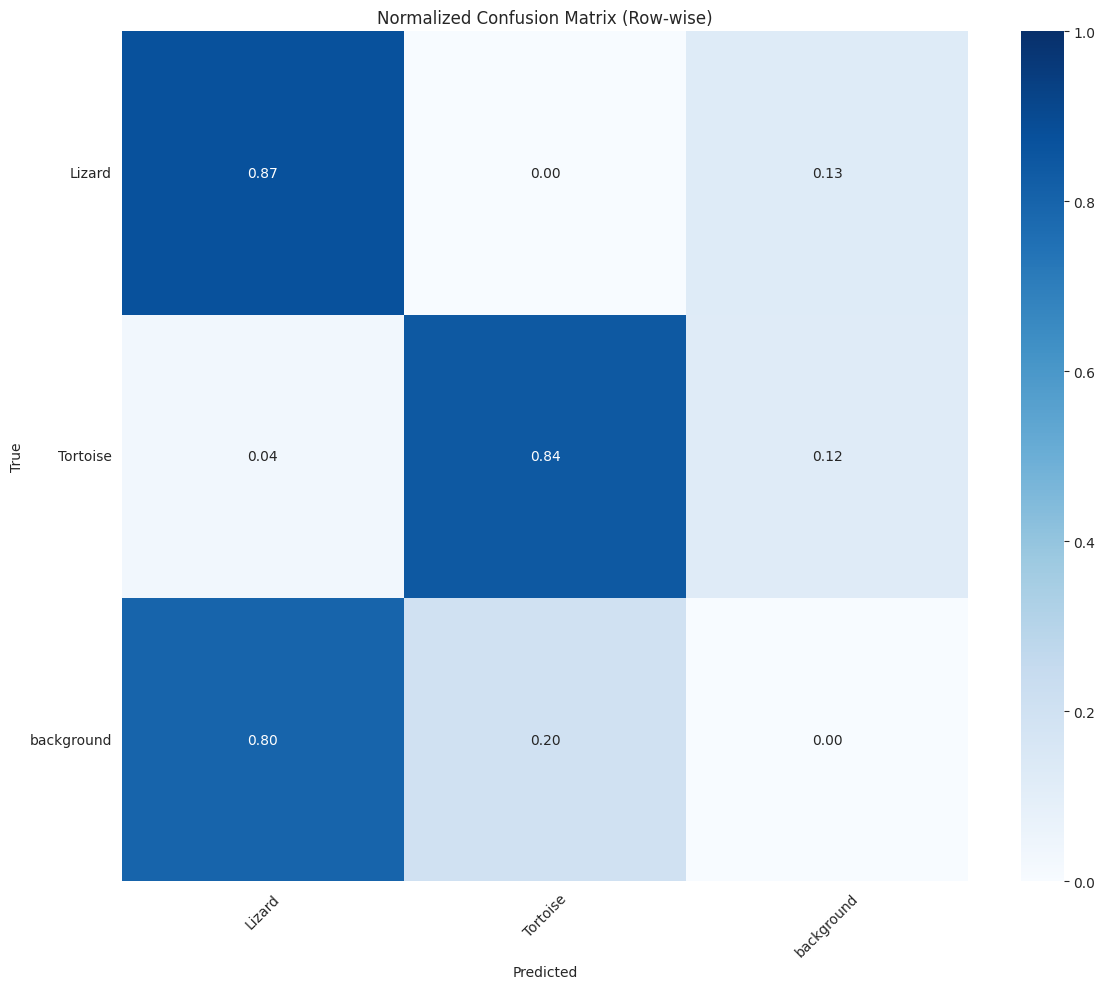

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycocotools import mask as maskUtils
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from sklearn.metrics import confusion_matrix
from collections import defaultdict

# Load ground truth and predictions
truth_json = "data/open-images-v7/val.json"
pred_json = "coco_style_predictions.json"

# Load COCO API for ground truth
coco_gt = COCO(truth_json)

# Load the original predictions
with open(pred_json) as f:
    pred_data = json.load(f)
    
# filter out low confidence
threshold = 0.5
filtered_data = [pred_data_t for pred_data_t in pred_data if pred_data_t['score']>=threshold]
coco_dt = coco_gt.loadRes(filtered_data)

class_names = [coco_gt.loadCats(ids)[0]['name'] for ids in coco_gt.getCatIds()]
num_classes = len(class_names)

def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]
    return interArea / (boxAArea + boxBArea - interArea + 1e-6)

def compute_confusion_matrix(coco_gt, coco_dt, iou_thresh=0.65):
    """
    Compute confusion matrix with IoU matching
    Returns: (raw_confusion_matrix, normalized_confusion_matrix)
    """
    num_classes = len(coco_gt.getCatIds())
    cm = np.zeros((num_classes+1, num_classes+1), dtype=int)  # +1 for background/FP
    
    for img_id in coco_gt.getImgIds():
        gt_anns = coco_gt.loadAnns(coco_gt.getAnnIds(imgIds=img_id))
        dt_anns = coco_dt.loadAnns(coco_dt.getAnnIds(imgIds=img_id))

        # Track which GT boxes have been matched
        matched_gt = [False] * len(gt_anns)
        
        # Process detections sorted by confidence (highest first)
        dt_anns = sorted(dt_anns, key=lambda x: -x['score'])
        
        for dt in dt_anns:
            best_iou = iou_thresh
            best_idx = -1
            
            # Find best matching GT
            for i, gt in enumerate(gt_anns):
                if not matched_gt[i]:
                    iou = compute_iou(dt['bbox'], gt['bbox'])
                    if iou > best_iou:
                        best_iou = iou
                        best_idx = i
            
            if best_idx >= 0:  # True positive (of at least there is object, despite of classes)
                matched_gt[best_idx] = True
                gt_class = gt_anns[best_idx]['category_id']  
                dt_class = dt['category_id']   
                cm[gt_class, dt_class] += 1
            else:  # False positive
                dt_class = dt['category_id'] 
                cm[-1, dt_class] += 1  # Last row is for FP
        
        # Any unmatched GT are false negatives
        for i, matched in enumerate(matched_gt):
            if not matched:
                gt_class = gt_anns[i]['category_id'] 
                cm[gt_class, -1] += 1  # Last column is for FN
    
    # Normalized version (row-wise)
    cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-6)
    
    return cm, cm_norm

# Compute matrices
cm_raw, cm_norm = compute_confusion_matrix(coco_gt, coco_dt)
class_names_with_bg = class_names + ['background']
# Plot raw confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_raw, annot=True, fmt='d', 
            xticklabels=class_names_with_bg, yticklabels=class_names_with_bg,
            cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Raw Counts)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('confusion_matrix_raw.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot normalized confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt='.2f', 
            xticklabels=class_names_with_bg, yticklabels=class_names_with_bg,
            cmap='Blues', vmin=0, vmax=1)
plt.title('Normalized Confusion Matrix (Row-wise)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('confusion_matrix_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

# The counts lie inside the top left to bottom right diagonal are the correct predictions
# The others are wrong predictions, where the x-axis is the predicted label and the y-axis is true label
# eg, the top right corner are the samples that are actually lizard but misclassified as background